# Sheet 8

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

from sklearn.linear_model import LogisticRegression

plt.rc('font', family='monospace', size=14, serif='courier')
plt.rc('mathtext', fontset='stix')

## 1 Projection Trick

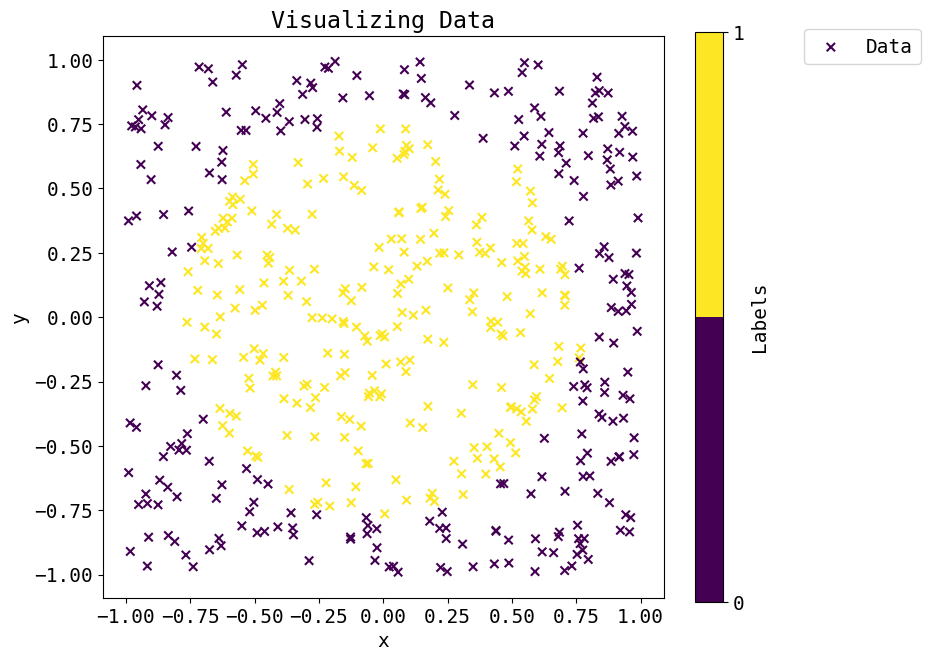

In [3]:
# Load the data
xy = np.load('data/data2d.npy')
labels = np.load('data/labels.npy')

# TODO: Plot the data
plt.figure(figsize=(8,8))

# plotting the data with discrete cmap for labels
cmap = plt.get_cmap('viridis', np.max(labels) - np.min(labels) + 1)
sct = plt.scatter(xy[:,0],xy[:,1],label='Data', marker='x',c=labels,cmap=cmap)
plt.colorbar(sct,ticks=np.arange(np.max(labels) - np.min(labels) + 1),
            label="Labels",fraction=0.046)

# setting aspect equal
ax = plt.gca()
ax.set_aspect("equal")


plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualizing Data')
plt.legend(loc=(1.25,0.95))

Mean Accuracy = 0.558


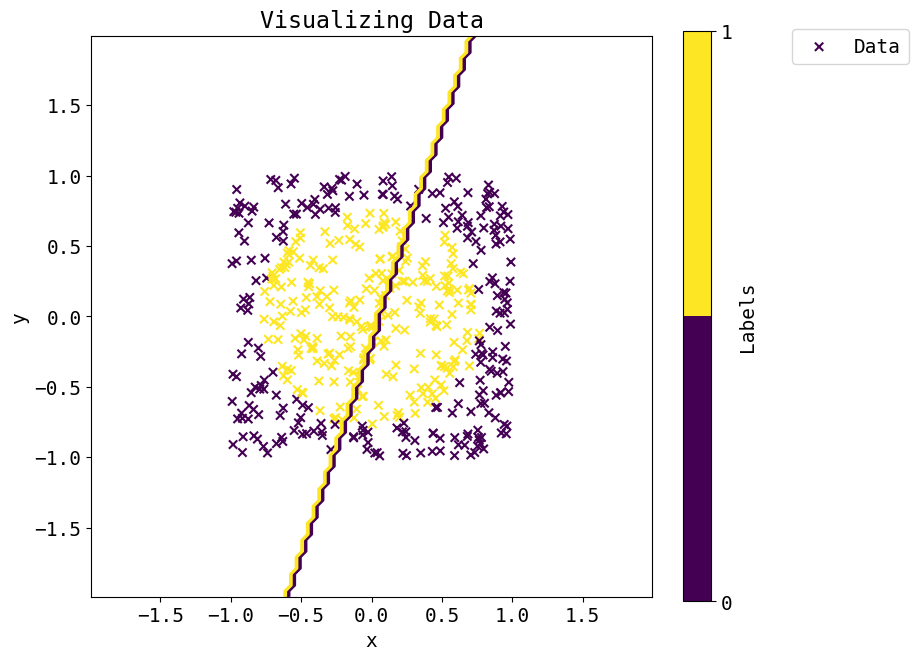

In [22]:
# TODO: fit logistic regression
logit_clf = LogisticRegression(random_state=0).fit(xy,labels)

# TODO: compute the accuracy
print(f"Mean Accuracy = {logit_clf.score(xy, labels)}")

# TODO: visualize the decision boundary
plt.figure(figsize=(8,8))

# setting aspect equal
ax = plt.gca()
ax.set_aspect("equal")


# plotting the data with discrete cmap for labels
cmap = plt.get_cmap('viridis', np.max(labels) - np.min(labels) + 1)
sct = plt.scatter(xy[:,0],xy[:,1],label='Data', marker='x',c=labels,cmap=cmap)
plt.colorbar(sct,ticks=np.arange(np.max(labels) - np.min(labels) + 1),
            label="Labels",fraction=0.046)

# plotting the decision boundary
from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator(
    logit_clf,
    xy,
    cmap=cmap,
    ax=ax,
    response_method="predict",
    plot_method="contour",
)


plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualizing Data')
plt.legend(loc=(1.25,0.95));

Text(0.5, 0, 'z')

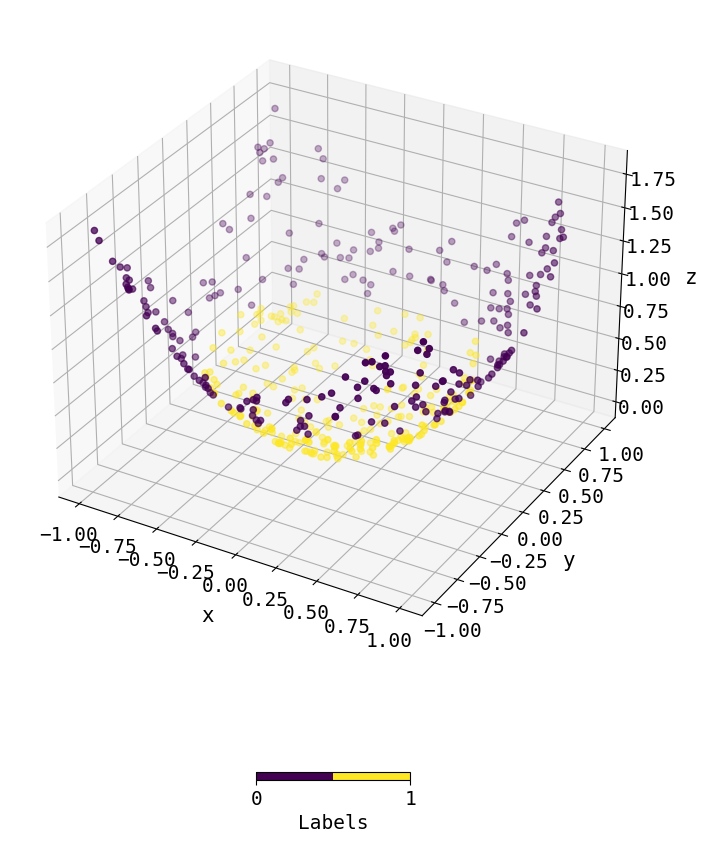

In [17]:
# TODO: Come up with a nonlinear tranformation for the third feature. Compute it and concatenate to the data.
z = xy[:,0]**2 + xy[:,1]**2

xyz = np.c_[xy,z]

# TODO: Show the enhanced data, e.g. with a 3D scatter plot 
#       (https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html)


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection='3d')


cmap = plt.get_cmap('viridis', np.max(labels) - np.min(labels) + 1)
sct = ax.scatter(xyz[:,0],xyz[:,1],xyz[:,2],label='Data', marker='o',c=labels,cmap=cmap)
plt.colorbar(sct,ticks=np.arange(np.max(labels) - np.min(labels) + 1),
            label="Labels",fraction=0.01,orientation='horizontal')


ax.set_xlabel('x',labelpad=10,fontsize=15)
ax.set_ylabel('y',labelpad=10,fontsize=15)
ax.set_zlabel('z',labelpad=10,fontsize=15)

In [23]:
# TODO: again, fit and evaluate logistic regression

parab_clf = LogisticRegression(random_state=0).fit(xyz,labels)
print(f"Mean Accuracy with the Third Feature Coordinate  = {parab_clf.score(xyz, labels)}")

Mean Accuracy with the Third Feature Coordinate  = 0.99


# 2. Training of an MLP

## (a) Fitting a NN

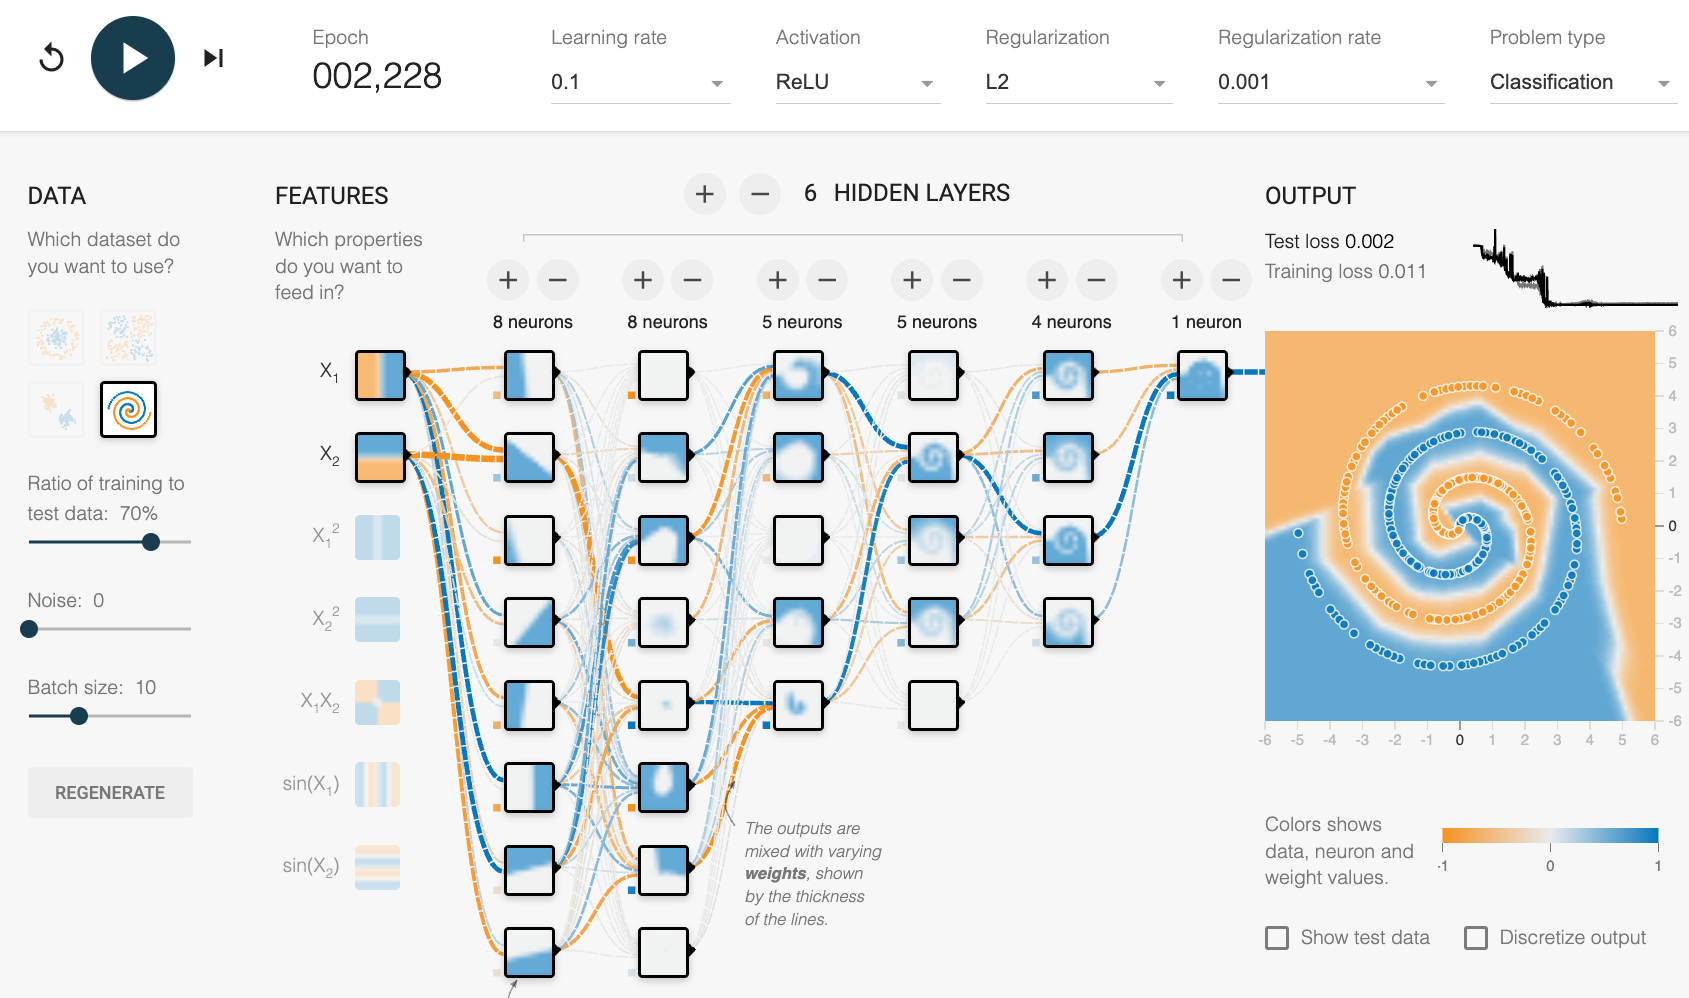

In [24]:
from IPython.display import Image
Image(filename='2.a.png') 

## (b) Exploring Regularization

### Without Regularization

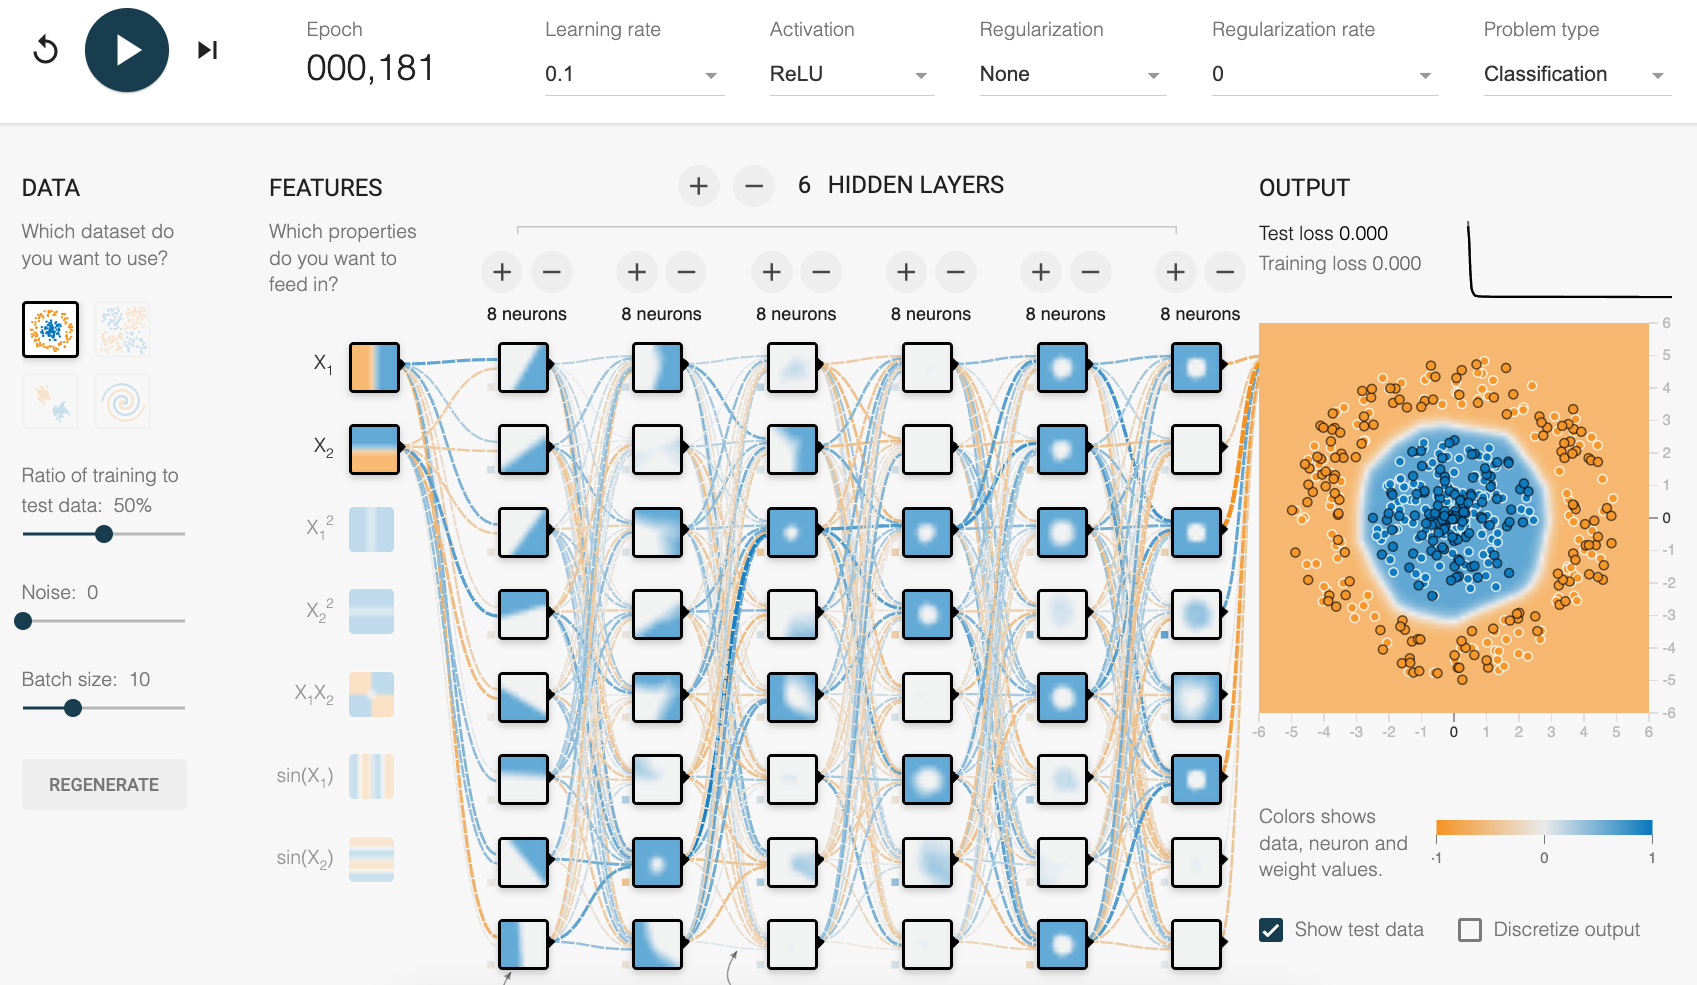

In [26]:
Image(filename='without_regularization.png') 

### With L1 - Lasso

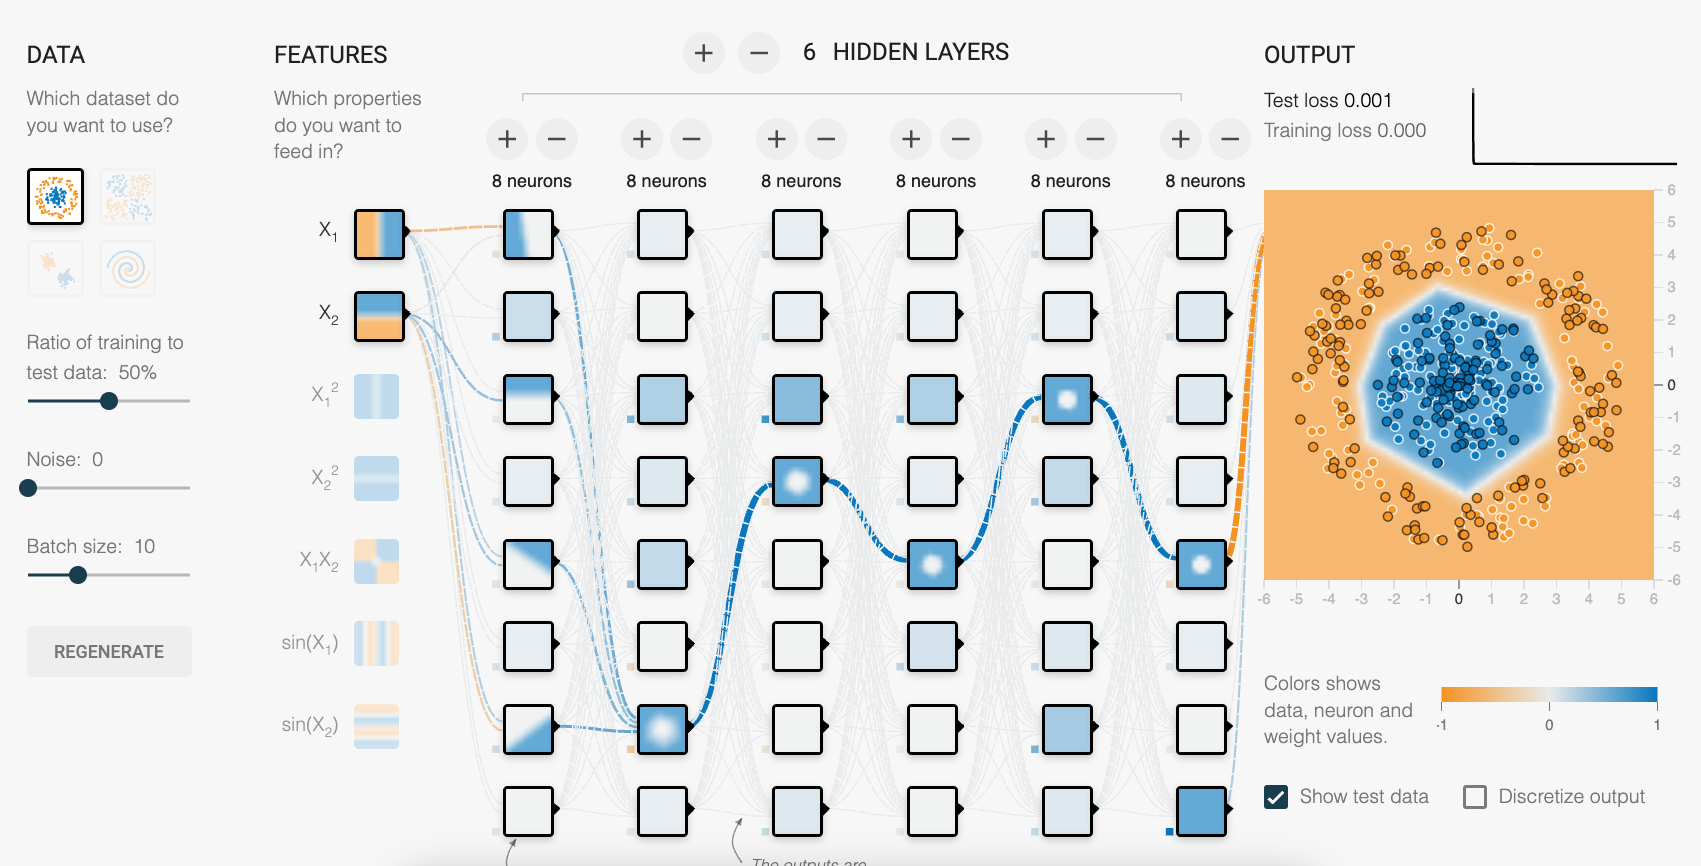

In [31]:
Image(filename='with_L1_01.png') 

### With L2 - Ridge

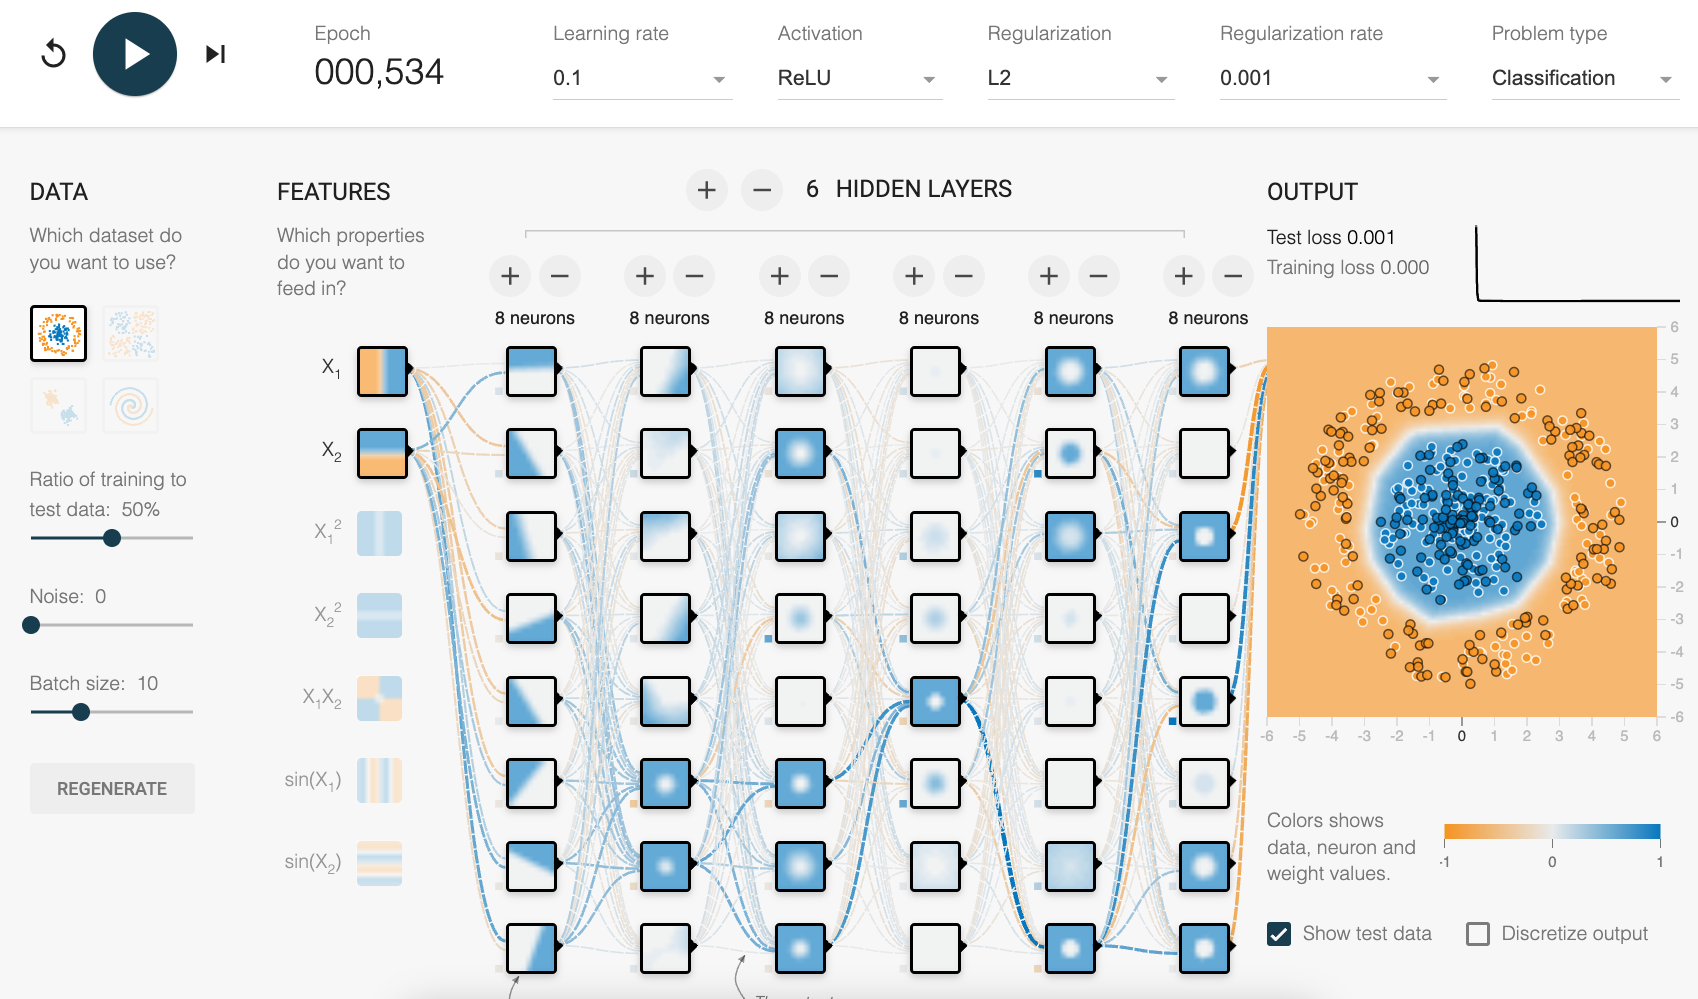

In [32]:
Image(filename='with_L2.png') 

## (c) Breaking Things

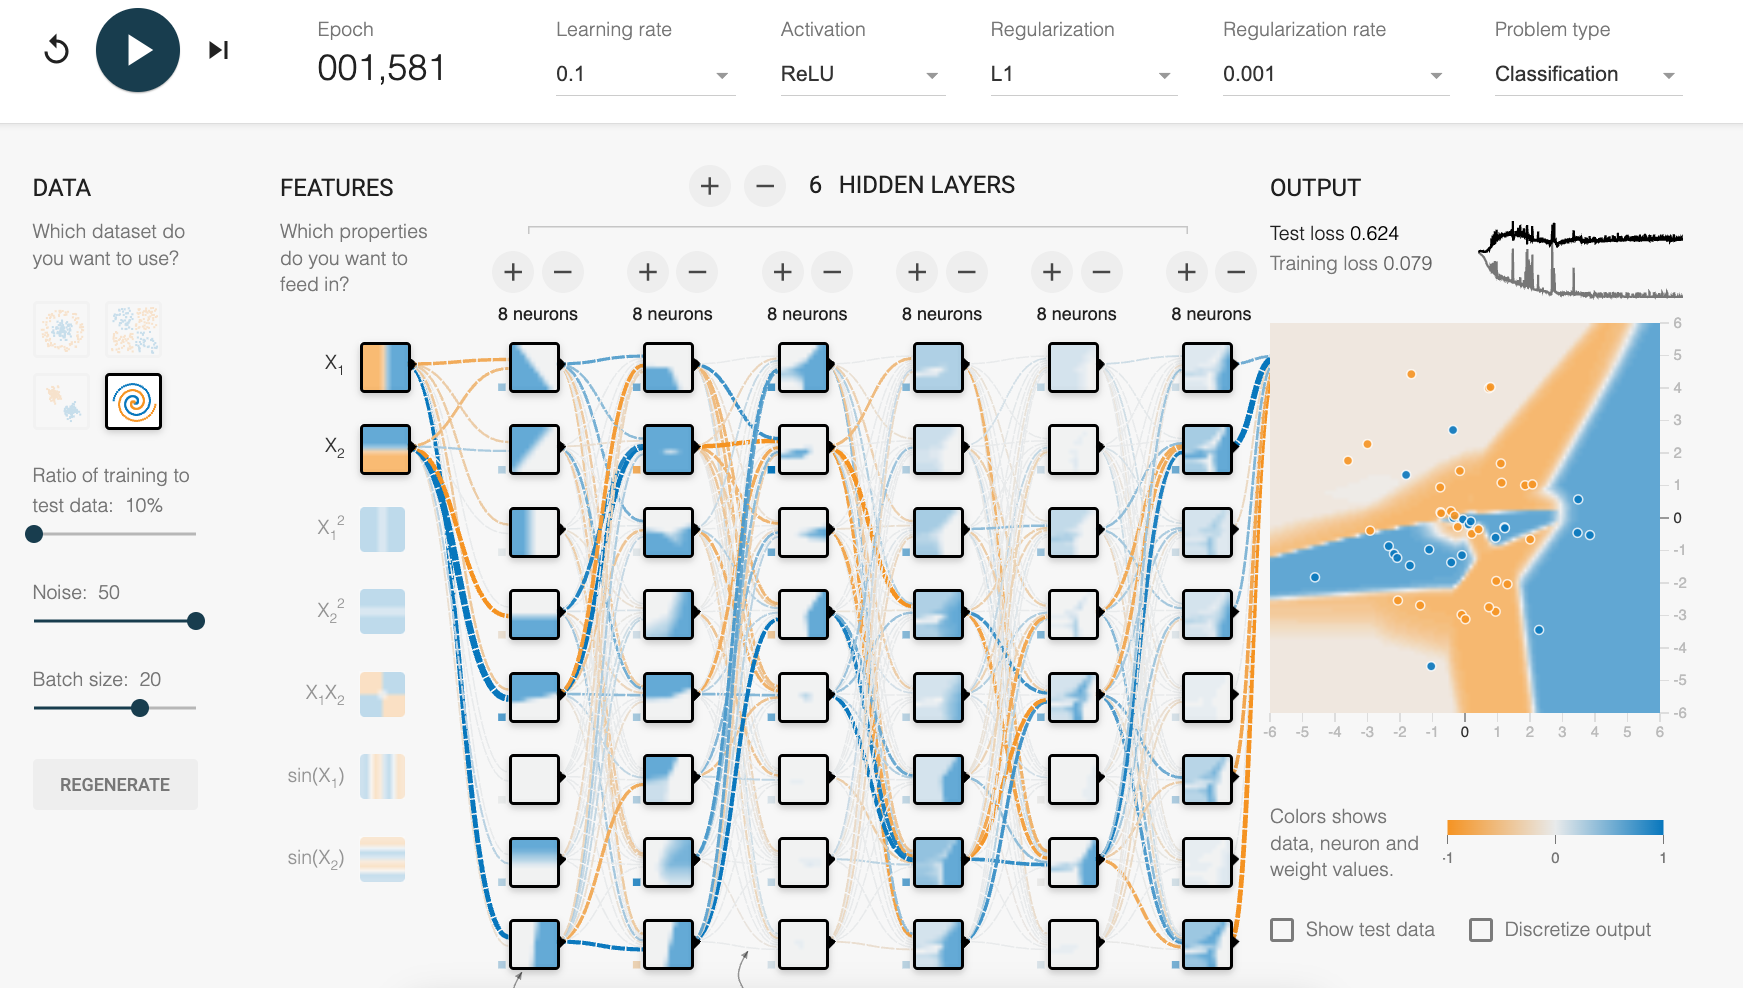

In [25]:
Image(filename='2.c.1.png') 